In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split


In [11]:
# Load data
df = pd.read_csv('LR_NonLinear.csv')
X = df[['x1', 'x2']].values
y = df['class'].values

In [12]:
#Menampilkan data
df.head()

,x1,x2,class
0,-0.023733,0.62456,1
1,-0.167742,0.60994,1
2,-0.288710,0.61725,1
3,-0.450000,0.42719,1
4,-0.588250,0.39064,1


In [13]:
#Menampilkan struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      236 non-null    float64
 1   x2      236 non-null    float64
 2   class   236 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.7 KB


In [14]:
#Menampilkan ukuran data
df.shape

(236, 3)

In [15]:
#Menampilkan statistik deskriptif data
df.describe()

,x1,x2,class
count,236.000000,236.000000,236.000000
mean,0.017279,0.145602,0.491525
std,0.497019,0.519996,0.500991
min,-0.905070,-0.844740,0.000000
25%,-0.383730,-0.289180,0.000000
50%,-0.046659,0.183260,0.000000
75%,0.455848,0.609940,1.000000
max,1.070900,1.108900,1.000000


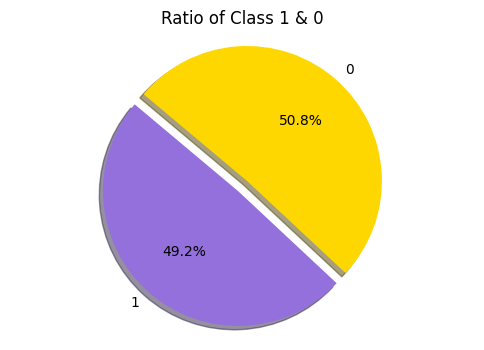

In [34]:
labels = 1, 0
sizes = [df['class'].value_counts()[1], df['class'].value_counts()[0]]
explode = (0.1, 0)
colors = ['#9370DB', '#FFD700']
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
plt.title("Ratio of Class 1 & 0")
plt.show()

In [16]:
#Visualisasi Data
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b*")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)
    plt.legend()

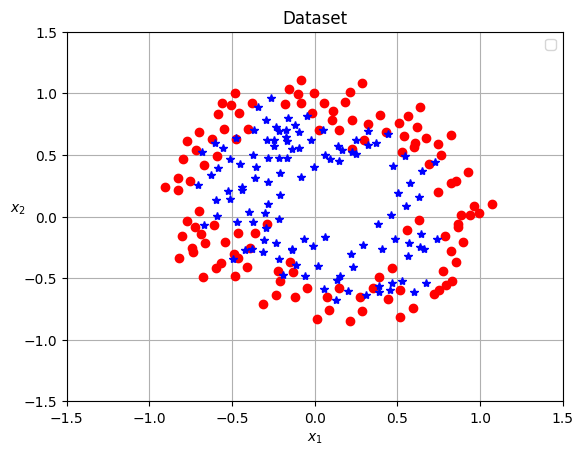

In [17]:
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])
plt.title("Dataset")
plt.show()

**Model SVM Linear**

In [20]:
# Model SVM Linear
linear_svm_clf = SVC(kernel="linear", C=1000)
linear_svm_clf.fit(X, y)
y_linear = linear_svm_clf.predict(X)
linear_accuracy = accuracy_score(y, y_linear)
print('Linear SVM:')
print('The hyperplane: y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}'.format(linear_svm_clf.coef_[0][0], linear_svm_clf.coef_[0][1], linear_svm_clf.intercept_[0]))
print('Accuracy: {:.2f}'.format(linear_accuracy))

Linear SVM:
The hyperplane: y = -1.35*x1 + -0.12*x2 + 0.19
Accuracy: 0.56


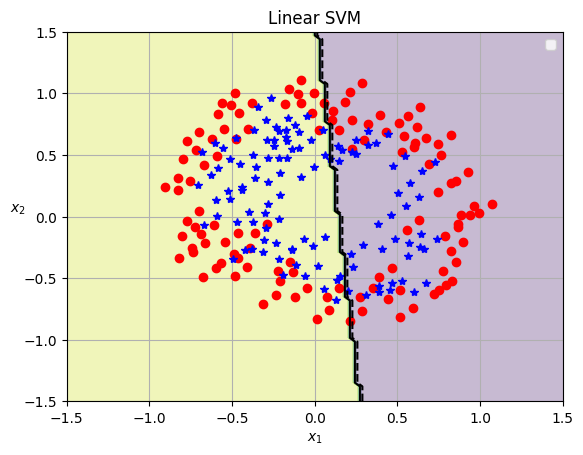

In [21]:
# Plot SVM Linear decision boundary
def plot_svc_decision_boundary(svm_clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = svm_clf.predict(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, alpha=0.3)
    plt.contour(x0, x1, y_pred, colors='k', linestyles=['--', '-', '--'], levels=[0, 0.5, 1])

plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])
plot_svc_decision_boundary(linear_svm_clf, [-1.5, 1.5, -1.5, 1.5])
plt.title("Linear SVM")
plt.show()

In [22]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

**Model SVM Polynomial**

In [23]:
# Model SVM Polynomial
param_grid_poly = {'svm_clf__degree': [2, 4, 8, 10], 'svm_clf__C': [0.001, 0.1, 10, 1000]}
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", coef0=1))
])
grid_search_poly = GridSearchCV(poly_kernel_svm_clf, param_grid_poly, cv=5, scoring='accuracy')
grid_search_poly.fit(X, y)
poly_accuracy = grid_search_poly.best_score_
poly_best_params = grid_search_poly.best_params_
print('Polynomial SVM:')
print('Best parameters:', poly_best_params)

Polynomial SVM:
Best parameters: {'svm_clf__C': 1000, 'svm_clf__degree': 2}


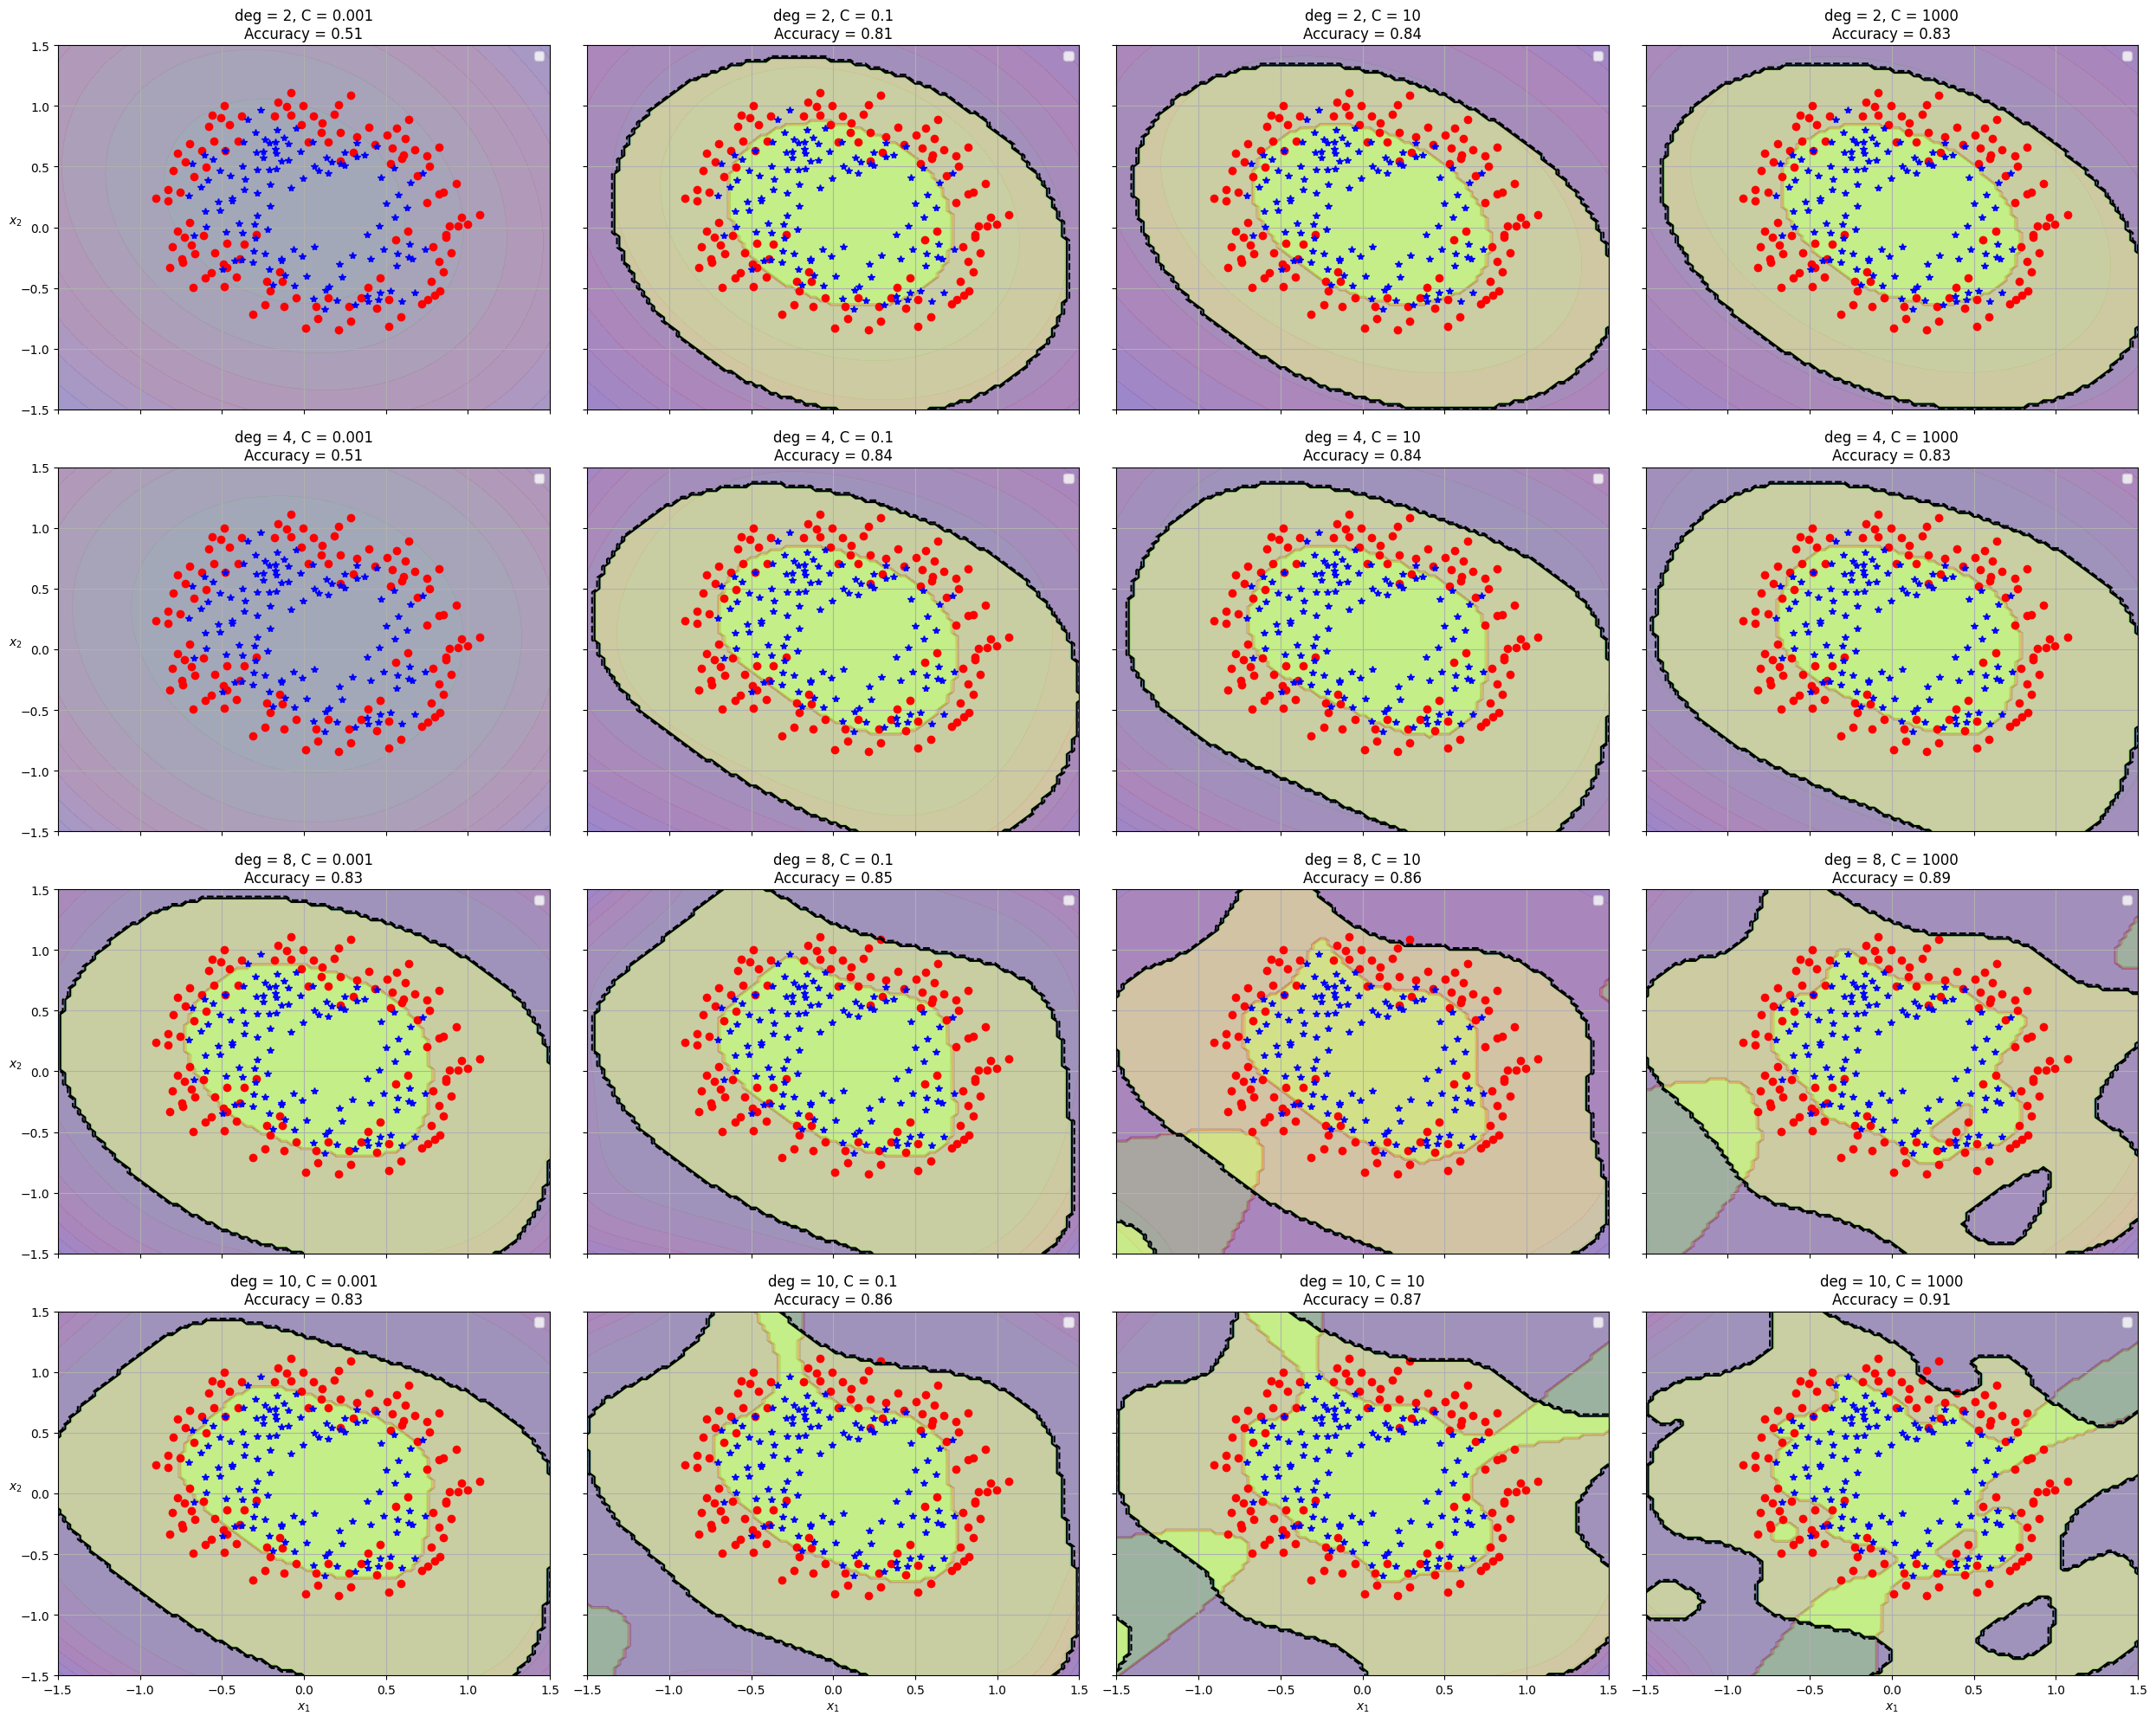

In [24]:
deg1, deg2, deg3, deg4 = 2, 4, 8, 10
C1, C2, C3, C4 = 0.001, 0.1, 10, 1000
hyperparams = (deg1, C1), (deg1, C2), (deg1, C3), (deg1, C4), (deg2, C1), (deg2, C2), (deg2, C3), (deg2, C4), (deg3, C1), (deg3, C2), (deg3, C3), (deg3, C4), (deg4, C1), (deg4, C2), (deg4, C3), (deg4, C4)

poly_svm_clfs = []
y_poly_acc = []
for deg, C in hyperparams:
    poly_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="poly", degree=deg, coef0= 1, C=C))
        ])
    poly_kernel_svm_clf.fit(X, y)
    poly_svm_clfs.append(poly_kernel_svm_clf)
    y_poly = poly_kernel_svm_clf.predict(X)
    y_poly_acc.append(accuracy_score(y, y_poly))

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 20),
                         sharex=True, sharey=True)

for i, (deg, C) in enumerate(hyperparams):
    svm_clf = poly_svm_clfs[i]
    plt.sca(axes[i // 4, i % 4])
    plot_predictions(svm_clf, [-1.5, 1.5, -1.5, 1.5])
    plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])
    plot_svc_decision_boundary(svm_clf.named_steps['svm_clf'], [-1.5, 1.5, -1.5, 1.5])
    acc_score = y_poly_acc[i]
    plt.title("deg = {}, C = {}\nAccuracy = {:.2f}".format(deg, C, acc_score))
    if i < 12:
        plt.xlabel("")
    if i % 4 != 0:
        plt.ylabel("")

plt.tight_layout()
plt.show()

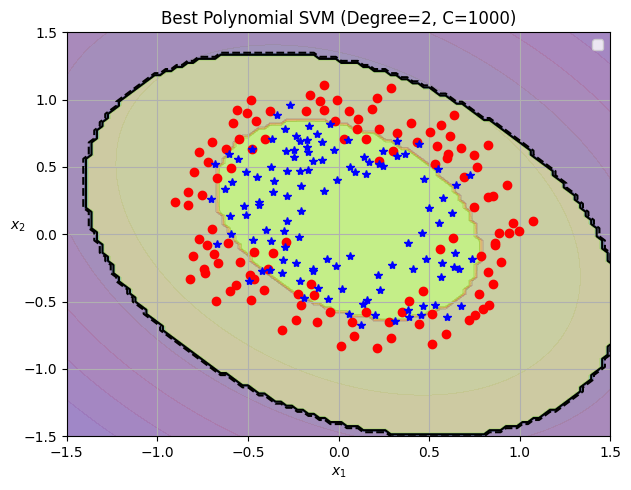

In [25]:
# Plot best SVM Polynomial
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])
# Menggunakan model terbaik yang didapat dari GridSearchCV
best_poly_model = grid_search_poly.best_estimator_
plot_predictions(best_poly_model, [-1.5, 1.5, -1.5, 1.5])
plot_svc_decision_boundary(best_poly_model.named_steps['svm_clf'], [-1.5, 1.5, -1.5, 1.5])
plt.title("Best Polynomial SVM (Degree={}, C={})".format(poly_best_params['svm_clf__degree'], poly_best_params['svm_clf__C']))

plt.tight_layout()
plt.show()

**Radial Basis Function (RBF) Kernel**

In [26]:
# Model SVM RBF
param_grid_rbf = {'svm_clf__gamma': [0.1, 1, 50, 100], 'svm_clf__C': [0.001, 0.1, 10, 1000]}
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf"))
])
grid_search_rbf = GridSearchCV(rbf_kernel_svm_clf, param_grid_rbf, cv=5, scoring='accuracy')
grid_search_rbf.fit(X, y)
rbf_accuracy = grid_search_rbf.best_score_
rbf_best_params = grid_search_rbf.best_params_
print('RBF SVM:')
print('Best parameters:', rbf_best_params)

RBF SVM:
Best parameters: {'svm_clf__C': 1000, 'svm_clf__gamma': 0.1}


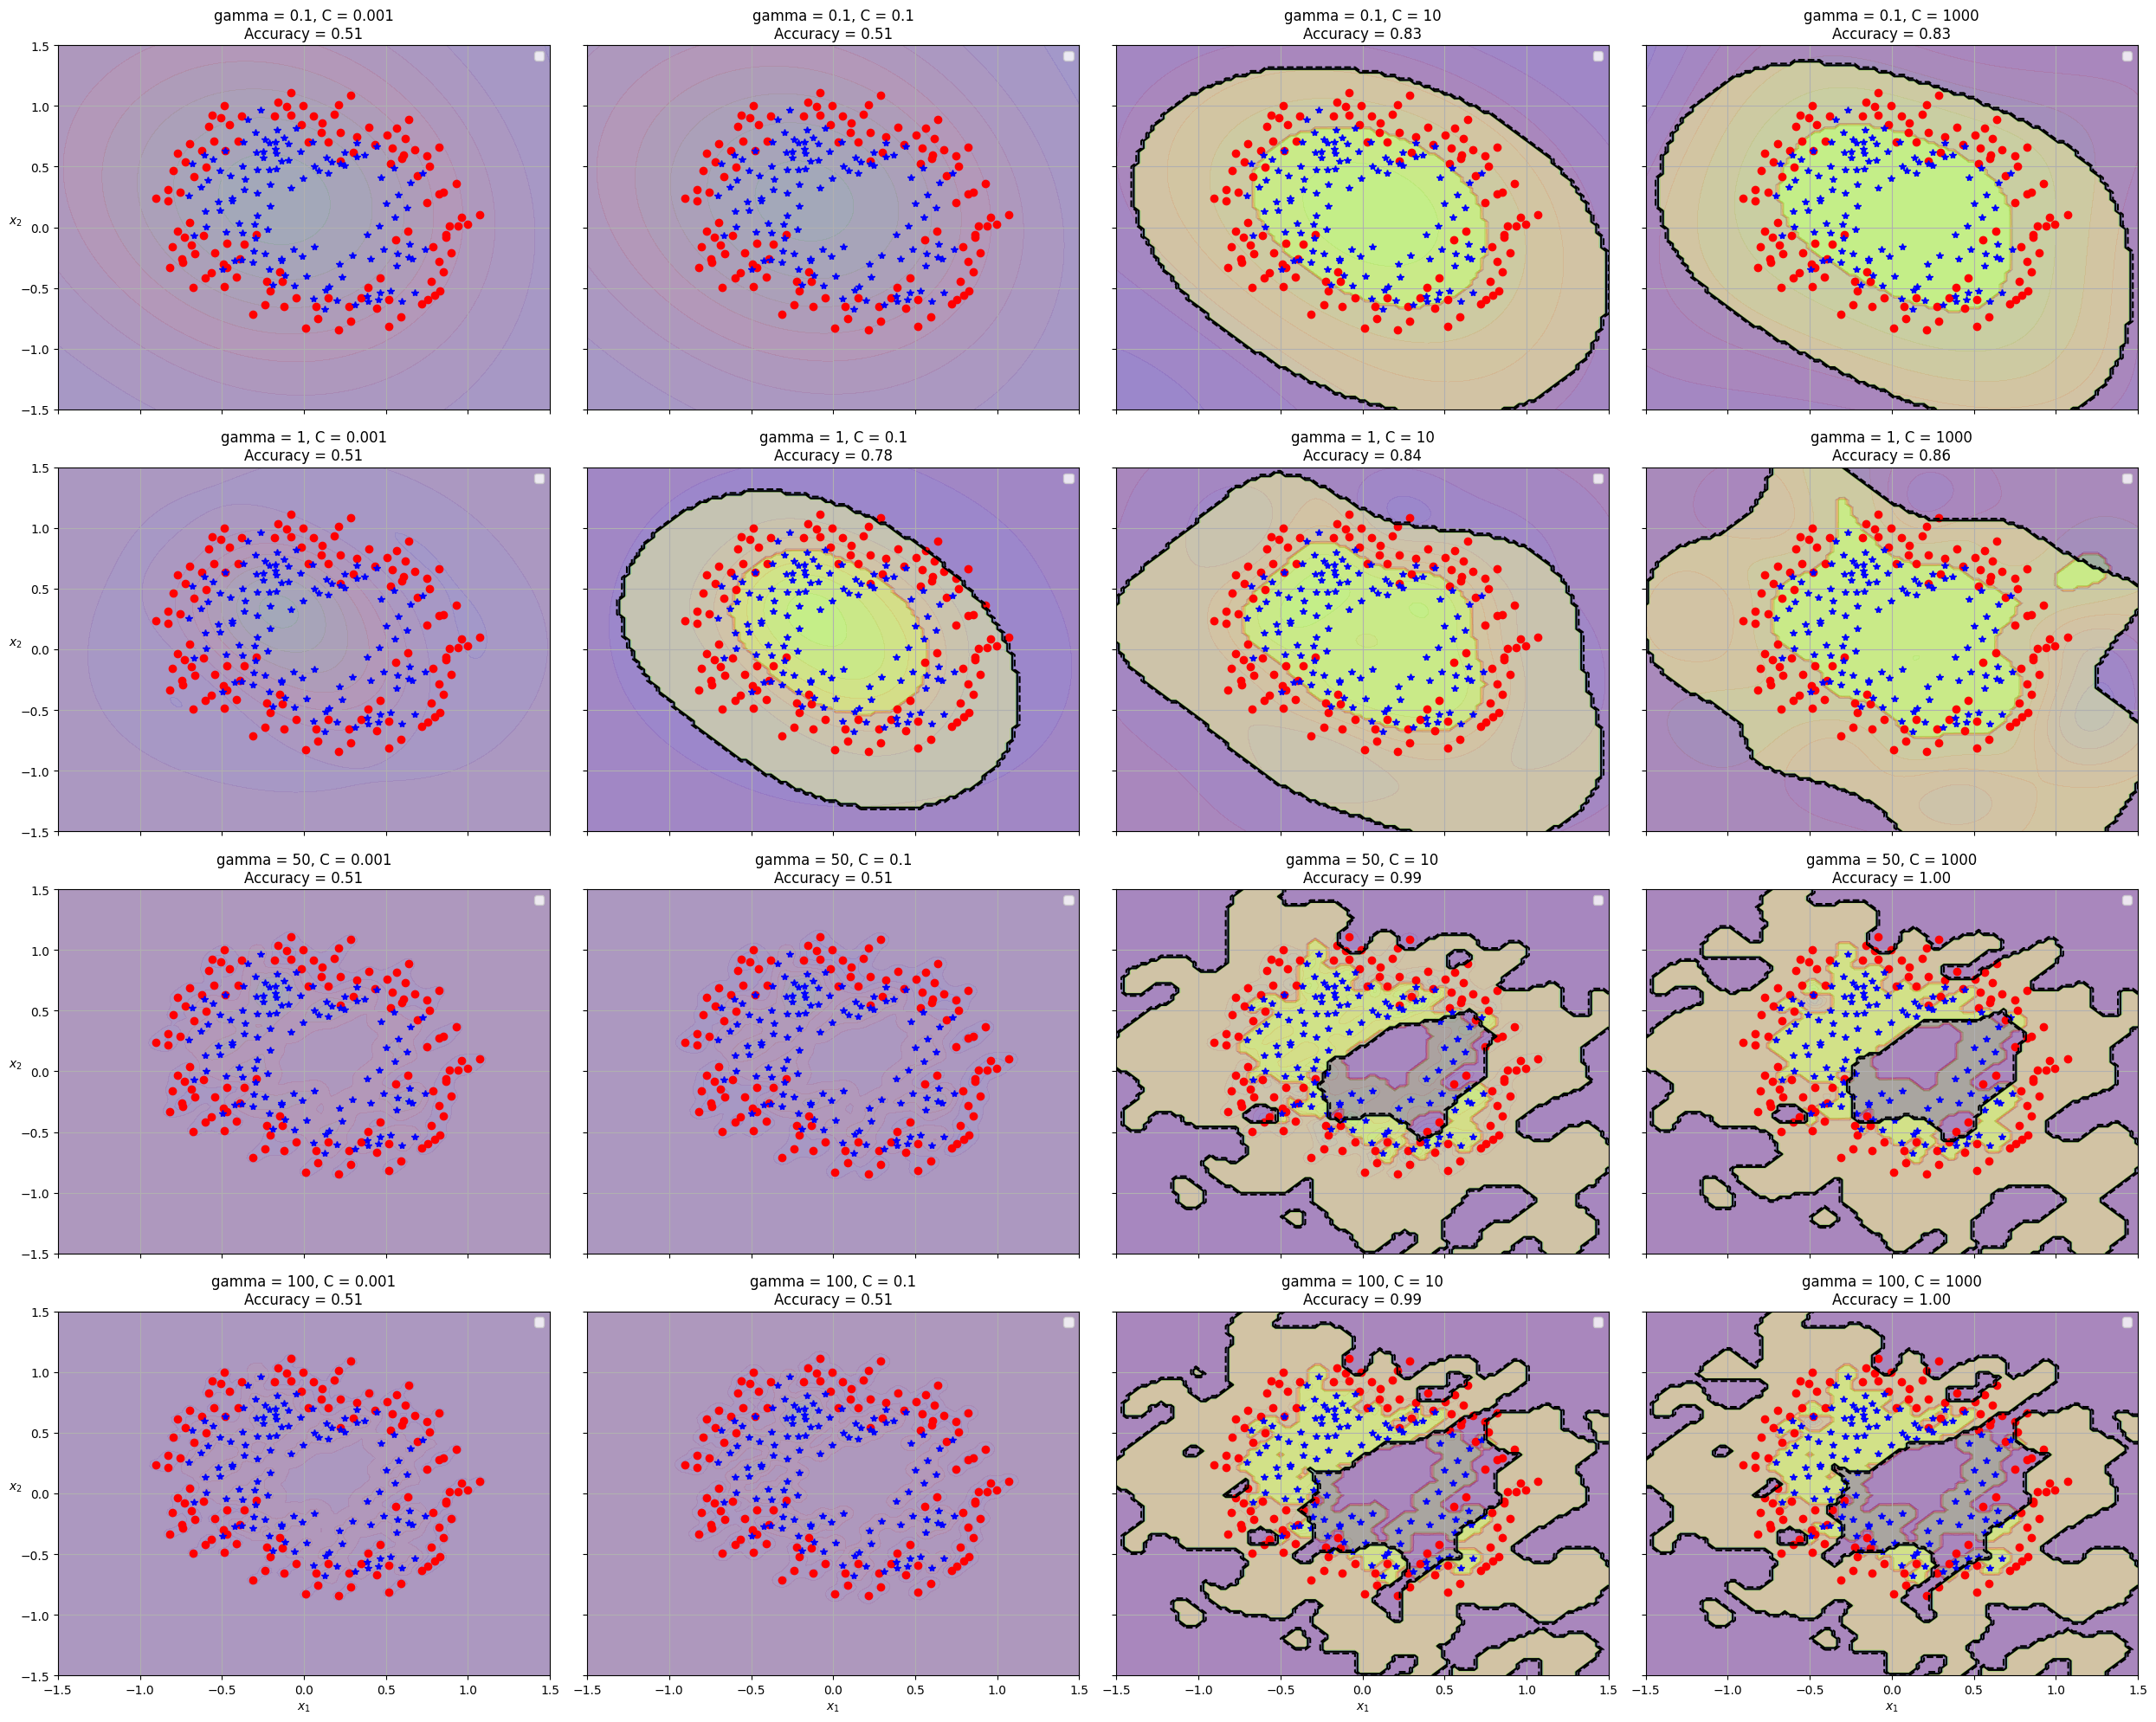

In [27]:
gamma1, gamma2, gamma3, gamma4 = 0.1, 1, 50, 100
C1, C2, C3, C4 = 0.001, 0.1, 10, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma1, C3), (gamma1, C4), (gamma2, C1), (gamma2, C2), (gamma2, C3), (gamma2, C4), (gamma3, C1), (gamma3, C2), (gamma3, C3), (gamma3, C4), (gamma4, C1), (gamma4, C2), (gamma4, C3), (gamma4, C4)

rbf_svm_clfs = []
y_rbf_acc = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    rbf_svm_clfs.append(rbf_kernel_svm_clf)
    y_rbf = rbf_kernel_svm_clf.predict(X)
    y_rbf_acc.append(accuracy_score(y, y_rbf))

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 20),
                         sharex=True, sharey=True)

for i, (gamma, C) in enumerate(hyperparams):
    svm_clf = rbf_svm_clfs[i]
    plt.sca(axes[i // 4, i % 4])
    plot_predictions(svm_clf, [-1.5, 1.5, -1.5, 1.5])
    plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])
    plot_svc_decision_boundary(svm_clf.named_steps['svm_clf'], [-1.5, 1.5, -1.5, 1.5])
    acc_score = y_rbf_acc[i]
    plt.title("gamma = {}, C = {}\nAccuracy = {:.2f}".format(gamma, C, acc_score))
    if i < 12:
        plt.xlabel("")
    if i != 0 and i != 4 and i != 8 and i != 12:
        plt.ylabel("")

plt.tight_layout()
plt.show()

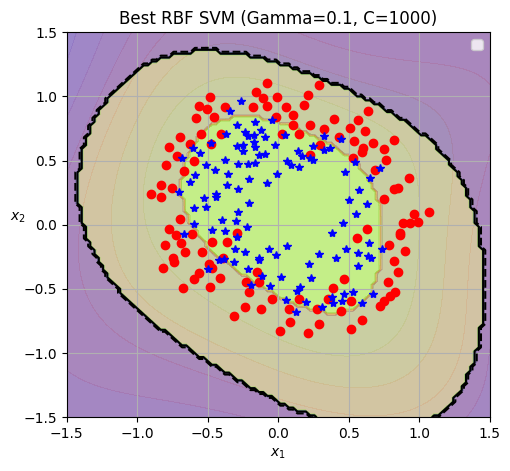

In [28]:
# Plot best RBF decision boundaries
best_rbf_model = grid_search_rbf.best_estimator_

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])
# Menggunakan model terbaik dari pencarian grid RBF SVM
plot_predictions(best_rbf_model, [-1.5, 1.5, -1.5, 1.5])
plot_svc_decision_boundary(best_rbf_model.named_steps['svm_clf'], [-1.5, 1.5, -1.5, 1.5])
plt.title("Best RBF SVM (Gamma={}, C={})".format(rbf_best_params['svm_clf__gamma'], rbf_best_params['svm_clf__C']))

plt.show()